In [6]:
# from google.colab import drive

# drive.mount('/content/drive')

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, KNNImputer
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

import warnings
warnings.filterwarnings("ignore")

# Load CSV file

In [8]:
import pandas as pd

file_path = '/content/drive/MyDrive/DataScience/final/full_data.csv'

df = pd.read_csv(file_path)

print(df)

      Display Size  Touch Screen  Rear Camera Quantity  Front Camera Quantity  \
0             6.60           1.0                     2                      1   
1             6.52           1.0                     2                      1   
2             6.52           1.0                     3                      1   
3             6.60           1.0                     2                      1   
4             6.60           1.0                     2                      1   
...            ...           ...                   ...                    ...   
3148          6.67           1.0                     3                      1   
3149          4.30           1.0                     2                      1   
3150           NaN           1.0                     3                      2   
3151          6.67           1.0                     3                      1   
3152          7.12           1.0                     3                      1   

      Rear Camera Pixel  Fr

* For preprocessing, we remove the records that has number of missing values >= 4

In [9]:
df = df.dropna(thresh=df.shape[1] - 3)
df

,Display Size,Touch Screen,Rear Camera Quantity,Front Camera Quantity,Rear Camera Pixel,Front Camera Pixel,Battery Capacity(mAh),Battery Type,Wireless Charging,Fast Charging,...,ScreenType_FULLVIEWDISPLAY,ScreenType_FOLDEDSCREEN,ScreenType_CORNINGGORILLAGLASS,ScreenType_DUALSCREEN,ScreenType_CURVEDSCREEN,ScreenType_WATERDROPSCREEN,ScreenType_OTHER,ScreenType_FLEXIBLESCREEN,ScreenType_NORMALSCREEN,ScreenType_FULLSCREEN
1,6.52,1.0,2,1,13.0,8.0,5000.0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
2,6.52,1.0,3,1,50.0,8.0,5000.0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
6,6.78,1.0,3,1,50.0,8.0,5000.0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
8,6.52,1.0,2,1,13.0,8.0,5000.0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
14,6.60,1.0,2,1,50.0,16.0,5160.0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3148,6.67,1.0,3,1,108.0,16.0,5160.0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
3149,4.30,1.0,2,1,48.0,16.0,3600.0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
3150,NaN,1.0,3,2,200.0,50.0,5000.0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
3151,6.67,1.0,3,1,108.0,16.0,4500.0,0,0,1,...,1,0,0,0,0,0,0,0,0,0


In [10]:
df["NFC"] = df["NFC"].replace({'yes': 1, 'No': 0})

In [11]:
def outlier(feature_name):
    percentile25 = df[feature_name].quantile(0.25)
    percentile75 = df[feature_name].quantile(0.75)
    iqr = percentile75 - percentile25
    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr
    return df[(df[feature_name] > upper_limit) | (df[feature_name] < lower_limit)], lower_limit, upper_limit

def trim(featuer_name, lower_limit, upper_limit):
    global df
    df = df[(lower_limit < df[featuer_name]) & (df[featuer_name] < upper_limit)]

before = df.shape[0]
trim('Battery Capacity(mAh)', outlier('Battery Capacity(mAh)')[1], outlier('Battery Capacity(mAh)')[2])
trim('price_vnd', outlier('price_vnd')[1], outlier('price_vnd')[2])
print("Number of rows that was removed: ", -df.shape[0] + before)


Number of rows that was removed:  557


In [60]:
from sklearn.model_selection import train_test_split
import random



random_seed = 42

X = df.drop('price_vnd', axis=1)
y = df['price_vnd']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=random_seed)
X_val, X_test, y_val, y_test =  train_test_split(X_test, y_test, test_size=0.5, random_state=random_seed)

X_train.shape

(1510, 54)

In [13]:
X_train.isnull().sum()

Display Size                          20
Touch Screen                          13
Rear Camera Quantity                   0
Front Camera Quantity                  0
Rear Camera Pixel                     18
Front Camera Pixel                    84
Battery Capacity(mAh)                  0
Battery Type                           0
Wireless Charging                      0
Fast Charging                          0
Charging Interface Type                0
3.5mm Headphone Port                   0
NFC                                   55
Item Condition                         0
num_sim_cards                          0
has_esim                               0
is_android_os                          0
Iris Recognition                       0
Side-mounted                           0
Fingerprint Recognition                0
In-Screen Fingerprint Recognition      0
Front-mounted                          0
Rear-mounted                           0
Face Recognition                       0
BAR             

In [14]:
X_train.describe()

,Display Size,Touch Screen,Rear Camera Quantity,Front Camera Quantity,Rear Camera Pixel,Front Camera Pixel,Battery Capacity(mAh),Battery Type,Wireless Charging,Fast Charging,...,ScreenType_FULLVIEWDISPLAY,ScreenType_FOLDEDSCREEN,ScreenType_CORNINGGORILLAGLASS,ScreenType_DUALSCREEN,ScreenType_CURVEDSCREEN,ScreenType_WATERDROPSCREEN,ScreenType_OTHER,ScreenType_FLEXIBLESCREEN,ScreenType_NORMALSCREEN,ScreenType_FULLSCREEN
count,1490.000000,1497.000000,1510.000000,1510.000000,1492.000000,1426.000000,1510.000000,1510.000000,1510.000000,1510.0,...,1510.000000,1510.000000,1510.0,1510.000000,1510.000000,1510.000000,1510.000000,1510.000000,1510.000000,1510.000000
mean,5.829819,0.979292,2.211921,1.029801,35.988606,12.137447,4075.992053,0.108609,0.136424,1.0,...,0.111921,0.001987,0.0,0.001325,0.029801,0.189404,0.033775,0.006623,0.479470,0.193377
std,1.164052,0.142453,1.001717,0.396856,31.807317,8.758157,1411.076442,0.311251,0.343352,0.0,...,0.315373,0.044543,0.0,0.036382,0.170095,0.391959,0.180709,0.081136,0.499744,0.395077
min,1.250000,0.000000,0.000000,0.000000,1.000000,1.000000,800.000000,0.000000,0.000000,1.0,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.500000,1.000000,1.000000,1.000000,13.000000,5.000000,3000.000000,0.000000,0.000000,1.0,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6.430000,1.000000,2.000000,1.000000,20.000000,8.000000,4500.000000,0.000000,0.000000,1.0,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6.600000,1.000000,3.000000,1.000000,50.000000,16.000000,5000.000000,0.000000,0.000000,1.0,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,7.300000,1.000000,6.000000,6.000000,200.000000,64.000000,7500.000000,1.000000,1.000000,1.0,...,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [15]:
numerical_cols = ['Display Size', 'Touch Screen', 'Rear Camera Quantity',
       'Front Camera Quantity', 'Rear Camera Pixel', 'Front Camera Pixel',
       'Battery Capacity(mAh)', 'Battery Type', 'Wireless Charging',
       'Fast Charging', 'Charging Interface Type', '3.5mm Headphone Port',
       'NFC', 'Item Condition', 'num_sim_cards', 'has_esim', 'is_android_os',
       'Iris Recognition', 'Side-mounted', 'Fingerprint Recognition',
       'In-Screen Fingerprint Recognition', 'Front-mounted', 'Rear-mounted',
       'Face Recognition', 'BAR', 'Flip', 'Rotatable', 'SLIDER', 'Watch',
       'Material Score', 'Memory Card Type Ordinal', 'Max Battery Capacity',
       'CE', 'EAC', 'FCC', 'RoHS', 'UL', 'WEEE', 'pse', 'CPU Score',
       'Highest Technology', 'Brand Target Encoded', 'Length of Resolution',
       'Width of Resolution', 'ScreenType_FULLVIEWDISPLAY',
       'ScreenType_FOLDEDSCREEN', 'ScreenType_CORNINGGORILLAGLASS',
       'ScreenType_DUALSCREEN', 'ScreenType_CURVEDSCREEN',
       'ScreenType_WATERDROPSCREEN', 'ScreenType_OTHER',
       'ScreenType_FLEXIBLESCREEN', 'ScreenType_NORMALSCREEN',
       'ScreenType_FULLSCREEN']

In [16]:
df1_train = X_train[numerical_cols]
df1_val = X_val[numerical_cols]
df1_test = X_test[numerical_cols]

In [17]:
imptr = KNNImputer()


In [18]:
X_train.columns

Index(['Display Size', 'Touch Screen', 'Rear Camera Quantity',
       'Front Camera Quantity', 'Rear Camera Pixel', 'Front Camera Pixel',
       'Battery Capacity(mAh)', 'Battery Type', 'Wireless Charging',
       'Fast Charging', 'Charging Interface Type', '3.5mm Headphone Port',
       'NFC', 'Item Condition', 'num_sim_cards', 'has_esim', 'is_android_os',
       'Iris Recognition', 'Side-mounted', 'Fingerprint Recognition',
       'In-Screen Fingerprint Recognition', 'Front-mounted', 'Rear-mounted',
       'Face Recognition', 'BAR', 'Flip', 'Rotatable', 'SLIDER', 'Watch',
       'Material Score', 'Memory Card Type Ordinal', 'Max Battery Capacity',
       'CE', 'EAC', 'FCC', 'RoHS', 'UL', 'WEEE', 'pse', 'CPU Score',
       'Highest Technology', 'Brand Target Encoded', 'Length of Resolution',
       'Width of Resolution', 'ScreenType_FULLVIEWDISPLAY',
       'ScreenType_FOLDEDSCREEN', 'ScreenType_CORNINGGORILLAGLASS',
       'ScreenType_DUALSCREEN', 'ScreenType_CURVEDSCREEN',
       'S

In [19]:
df["NFC"]

1       0.0
2       0.0
6       1.0
8       0.0
14      1.0
       ... 
3146    1.0
3148    1.0
3149    1.0
3150    1.0
3151    1.0
Name: NFC, Length: 1777, dtype: float64

In [20]:
df_train = pd.DataFrame(imptr.fit_transform(df1_train.values), columns = df1_train.columns)
df_val = pd.DataFrame(imptr.transform(df1_val.values), columns = df1_val.columns)
df_test = pd.DataFrame(imptr.transform(df1_test.values), columns = df1_test.columns)
df_train = df_train.reset_index(drop = True)
df_val = df_val.reset_index(drop = True)
df_test = df_test.reset_index(drop = True)
df_train

,Display Size,Touch Screen,Rear Camera Quantity,Front Camera Quantity,Rear Camera Pixel,Front Camera Pixel,Battery Capacity(mAh),Battery Type,Wireless Charging,Fast Charging,...,ScreenType_FULLVIEWDISPLAY,ScreenType_FOLDEDSCREEN,ScreenType_CORNINGGORILLAGLASS,ScreenType_DUALSCREEN,ScreenType_CURVEDSCREEN,ScreenType_WATERDROPSCREEN,ScreenType_OTHER,ScreenType_FLEXIBLESCREEN,ScreenType_NORMALSCREEN,ScreenType_FULLSCREEN
0,5.50,1.0,1.0,1.0,13.0,5.0,3010.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,6.00,1.0,2.0,1.0,12.0,12.0,3300.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,6.30,1.0,2.0,1.0,12.0,8.0,3700.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,4.00,1.0,1.0,1.0,13.0,5.0,2000.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,6.80,1.0,4.0,1.0,108.0,40.0,5000.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1505,6.55,1.0,1.0,1.0,12.0,5.0,2600.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1506,4.00,1.0,1.0,1.0,5.0,2.0,2000.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1507,3.60,1.0,1.0,1.0,16.0,8.0,2000.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1508,6.70,1.0,3.0,1.0,200.0,32.0,5000.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


# Feature Scaling
* We use min-max scaler for feature scaling

In [21]:
X_train = df_train
X_val = df_val
X_test = df_test

In [61]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
scaler = MinMaxScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = df_train.columns)
X_val= pd.DataFrame(scaler.transform(X_val), columns = df_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns = df_train.columns)
X_val

,Display Size,Touch Screen,Rear Camera Quantity,Front Camera Quantity,Rear Camera Pixel,Front Camera Pixel,Battery Capacity(mAh),Battery Type,Wireless Charging,Fast Charging,...,ScreenType_FULLVIEWDISPLAY,ScreenType_FOLDEDSCREEN,ScreenType_CORNINGGORILLAGLASS,ScreenType_DUALSCREEN,ScreenType_CURVEDSCREEN,ScreenType_WATERDROPSCREEN,ScreenType_OTHER,ScreenType_FLEXIBLESCREEN,ScreenType_NORMALSCREEN,ScreenType_FULLSCREEN
0,0.871074,1.0,0.500000,0.166667,0.060302,0.111111,0.552239,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.876033,1.0,0.500000,0.166667,0.055276,0.174603,0.472985,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.917355,1.0,0.333333,0.166667,0.095477,0.063492,0.649254,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.872727,1.0,0.500000,0.166667,0.075377,0.111111,0.649254,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.871074,1.0,0.333333,0.166667,0.246231,0.111111,0.507463,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,0.454545,1.0,0.166667,0.166667,0.005025,0.000000,0.029851,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
129,0.884298,1.0,0.500000,0.166667,0.246231,0.111111,0.611940,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
130,0.915702,1.0,0.833333,0.166667,0.075377,0.063492,0.656716,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
131,0.685950,1.0,0.166667,0.166667,0.090452,0.015873,0.389552,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [23]:
def eval(X_train, X_test, y_train, y_test, model = RandomForestRegressor(n_estimators = 400, verbose = 1, random_state = 42)):
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    r2 = r2_score(y_test, preds)
    return r2

In [24]:
def eval_train(X_train, X_test, y_train, y_test, model = RandomForestRegressor(n_estimators = 400, verbose = 1, random_state = 42)):
    model.fit(X_train, y_train)
    preds = model.predict(X_train)
    r2 = r2_score(y_train, preds)
    return r2

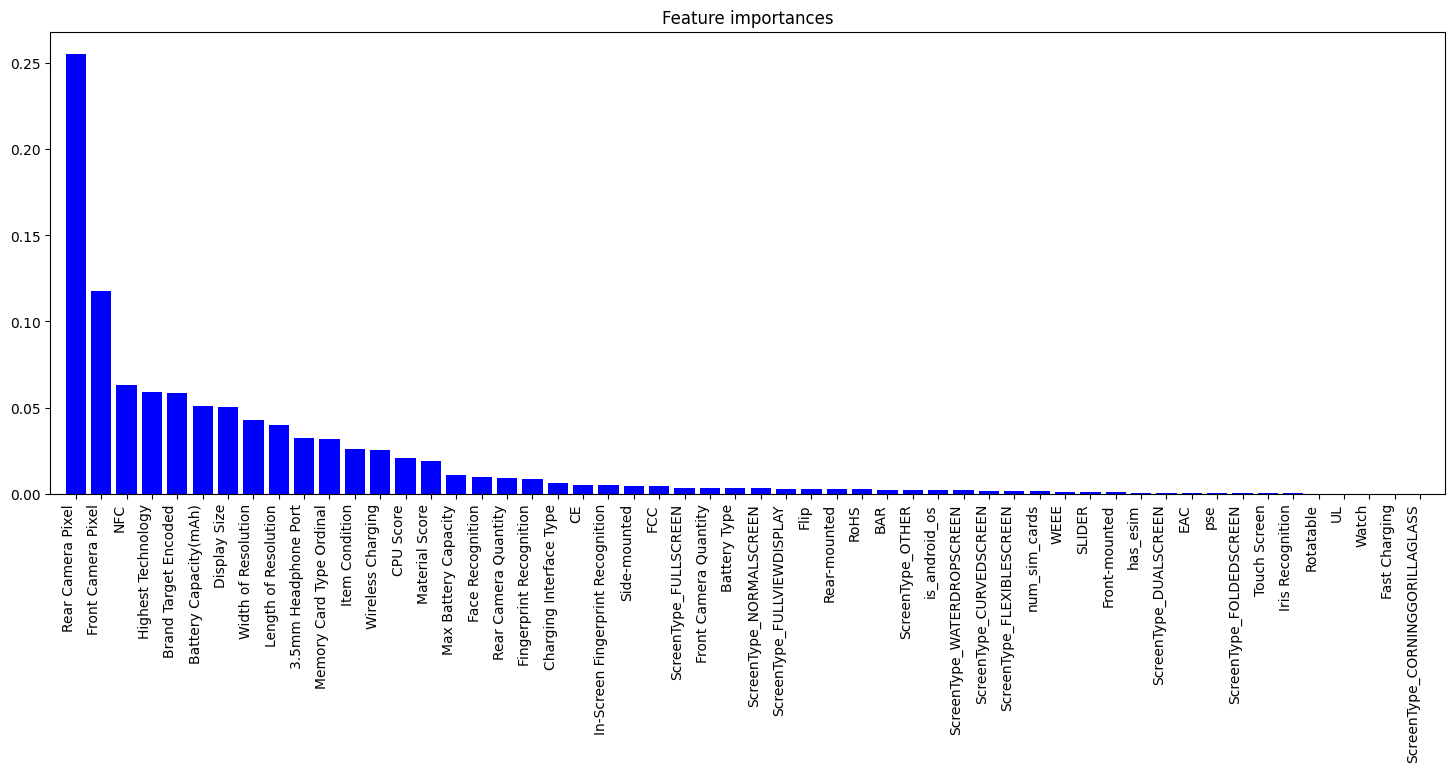

In [25]:
rf = RandomForestRegressor(n_estimators = 300, random_state=42)
rf.fit(X_train, y_train)
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(18, 6))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
        color="blue", align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90, ha='right')
plt.xlim([-1, X_train.shape[1]])
plt.show()

In [26]:
from sklearn.feature_selection import SelectFromModel
sfm = SelectFromModel(rf, threshold=0.015)
sfm.fit(X_train, y_train)
X_train = sfm.transform(X_train)
X_val = sfm.transform(X_val)
X_test = sfm.transform(X_test)
print("Number of features remaining: ", X_train.shape[1])


Number of features remaining:  15


In [27]:
eval(X_train, X_test, y_train,y_test)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    1.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s


0.7304049264619561

In [28]:
eval_train(X_train, X_test, y_train,y_test)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    1.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s


0.9605763943743503

In [29]:
def tune_random_forest(X_train, y_train, X_val, y_val, X_test, y_test):
    param_grid = {
        'n_estimators': [100, 300, 500],
        'max_depth': [3, 5, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': [1.0, 'sqrt'],
        'bootstrap': [True, False]
    }

    best_model = None
    best_params = None
    best_r2_val = -float('inf')

    for n_estimators in param_grid['n_estimators']:
        for max_depth in param_grid['max_depth']:
            for min_samples_split in param_grid['min_samples_split']:
                for min_samples_leaf in param_grid['min_samples_leaf']:
                    for max_features in param_grid['max_features']:
                        for bootstrap in param_grid['bootstrap']:
                            rf = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth,
                                                       min_samples_split=min_samples_split,
                                                       min_samples_leaf=min_samples_leaf,
                                                       max_features=max_features, bootstrap=bootstrap, random_state = 42)

                            rf.fit(X_train, y_train)

                            y_val_pred = rf.predict(X_val)

                            r2_val = r2_score(y_val, y_val_pred)

                            if r2_val > best_r2_val:
                                best_model = rf
                                best_params = {'n_estimators': n_estimators, 'max_depth': max_depth,
                                               'min_samples_split': min_samples_split,
                                               'min_samples_leaf': min_samples_leaf,
                                               'max_features': max_features, 'bootstrap': bootstrap}
                                best_r2_val = r2_val

    y_test_pred = best_model.predict(X_test)

    r2_test = r2_score(y_test, y_test_pred)
    print("R-squared Score on Testing Set:", r2_test)
    y_train_pred = best_model.predict(X_train)

    r2_train = r2_score(y_train, y_train_pred)
    print("R-squared Score on Training Set:", r2_train)
    return best_model, best_params

In [30]:
best_model, best_params = tune_random_forest(X_train, y_train, X_val, y_val, X_test, y_test)

R-squared Score on Testing Set: 0.7687382821534519
R-squared Score on Training Set: 0.9434625331434053


In [31]:
# eval(X_train, X_test, y_train, y_test, model = best_model)

In [32]:

def tune_decision_tree(X_train, y_train, X_val, y_val, X_test, y_test):
    best_model = None
    best_params = None
    best_r2_val = -float('inf')

    param_grid = {
        'max_depth': [3, 5, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': [1.0, 'sqrt']
    }

    for max_depth in param_grid['max_depth']:
        for min_samples_split in param_grid['min_samples_split']:
            for min_samples_leaf in param_grid['min_samples_leaf']:
                for max_features in param_grid['max_features']:
                    dt = DecisionTreeRegressor(max_depth=max_depth,
                                               min_samples_split=min_samples_split,
                                               min_samples_leaf=min_samples_leaf,
                                               max_features=max_features, random_state=42)

                    dt.fit(X_train, y_train)

                    y_val_pred = dt.predict(X_val)

                    r2_val = r2_score(y_val, y_val_pred)

                    if r2_val > best_r2_val:
                        best_model = dt
                        best_params = {'max_depth': max_depth,
                                       'min_samples_split': min_samples_split,
                                       'min_samples_leaf': min_samples_leaf,
                                       'max_features': max_features}
                        best_r2_val = r2_val

    y_test_pred = best_model.predict(X_test)

    r2_test = r2_score(y_test, y_test_pred)
    print("R-squared Score on Testing Set:", r2_test)
    y_train_pred = best_model.predict(X_train)

    r2_train = r2_score(y_train, y_train_pred)
    print("R-squared Score on Training Set:", r2_train)

    return best_model, best_params

In [33]:
best_tree_model, best_tree_params = tune_decision_tree(X_train, y_train, X_val, y_val, X_test, y_test)

R-squared Score on Testing Set: 0.6697803873217985
R-squared Score on Training Set: 0.7959951086692462


In [34]:
eval(X_train, X_test, y_train, y_test, model = best_tree_model)

0.6697803873217985

In [35]:
eval_train(X_train, X_test, y_train, y_test, model = best_tree_model)

0.7959951086692462

In [45]:
!pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.4/413.4 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 17.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 8.3 MB/s eta 0:00:00


In [48]:
import optuna
from sklearn.model_selection import cross_val_score

def objective(trial):
    """Define the objective function"""
    # train_x, valid_x, train_y, valid_y = train_test_split(X_train, y_train, test_size=0.15,random_state=42)
    params = {
        'max_depth': trial.suggest_categorical('max_depth', [5, 6, 8, 11, 15, 18]),
        'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
        'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.1, 1.0),
        'n_estimators': trial.suggest_int('n_estimators', 50, 500),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
        'subsample': trial.suggest_loguniform('subsample', 0.01, 1.0),
        'colsample_bytree': trial.suggest_categorical('colsample_bytree', [0.6, 0.7, 0.8, 0.9, 1.0]),
        'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-8, 1.0),
        'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-8, 1.0),
        'random_state': 1
    }

    # Fit the model
    model = XGBRegressor(**params)
    r2 = cross_val_score(model, X_train, y_train, cv=5, scoring = 'r2').mean()
    return r2
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=280)

[I 2023-12-29 11:26:55,309] A new study created in memory with name: no-name-15e61d14-47a0-427b-a078-51fb1c36abbf
[I 2023-12-29 11:27:02,092] Trial 0 finished with value: -1.1162468271793489 and parameters: {'max_depth': 6, 'lambda': 0.00202122021175485, 'alpha': 0.014267781409422127, 'learning_rate': 0.15467490728601177, 'n_estimators': 469, 'min_child_weight': 1, 'gamma': 4.409526879431021e-07, 'subsample': 0.016252888737777662, 'colsample_bytree': 0.6, 'reg_alpha': 0.007532298364235928, 'reg_lambda': 0.0004901232701399035}. Best is trial 0 with value: -1.1162468271793489.
[I 2023-12-29 11:27:03,131] Trial 1 finished with value: 0.7167418107000103 and parameters: {'max_depth': 5, 'lambda': 5.918945336855921, 'alpha': 3.33349361606045, 'learning_rate': 0.4957708755830619, 'n_estimators': 379, 'min_child_weight': 8, 'gamma': 9.129071308390201e-05, 'subsample': 0.978156650621165, 'colsample_bytree': 1.0, 'reg_alpha': 0.00029437650555119563, 'reg_lambda': 0.009110032631067378}. Best is t

In [50]:
best_params = study.best_trial.params
print(best_params)

{'max_depth': 6, 'lambda': 0.002526388107182394, 'alpha': 9.482661868964708, 'learning_rate': 0.10415147731200217, 'n_estimators': 196, 'min_child_weight': 4, 'gamma': 1.9470471349183763e-08, 'subsample': 0.8551126558379057, 'colsample_bytree': 0.8, 'reg_alpha': 3.651285096193761e-08, 'reg_lambda': 8.869672651316391e-08}


In [41]:
def tune_xgboost(X_train, y_train, X_val, y_val, X_test, y_test):

    param_grid = {
        'max_depth': [3, 5, None],
        'learning_rate': [0.01, 0.1, 0.5],
        'n_estimators': [100, 300, 500, 700],
        'gamma': [0, 0.1, 0.5]
    }

    best_model = None
    best_params = None
    best_r2_val = -float('inf')

    for max_depth in param_grid['max_depth']:
        for learning_rate in param_grid['learning_rate']:
            for n_estimators in param_grid['n_estimators']:
                for gamma in param_grid['gamma']:
                    xgb = XGBRegressor(max_depth=max_depth, learning_rate=learning_rate,
                                       n_estimators=n_estimators, gamma=gamma, random_state = 42)

                    xgb.fit(X_train, y_train)

                    y_val_pred = xgb.predict(X_val)

                    r2_val = r2_score(y_val, y_val_pred)

                    if r2_val > best_r2_val:
                        best_model = xgb
                        best_params = {'max_depth': max_depth, 'learning_rate': learning_rate,
                                       'n_estimators': n_estimators, 'gamma': gamma}
                        best_r2_val = r2_val

    y_test_pred = best_model.predict(X_test)

    r2_test = r2_score(y_test, y_test_pred)
    print("R-squared Score on Testing Set:", r2_test)
    y_train_pred = best_model.predict(X_train)

    r2_train = r2_score(y_train, y_train_pred)
    print("R-squared Score on Training Set:", r2_train)


    return best_model, best_params

In [42]:
best_xgb_model, best_xgb_params = tune_xgboost(X_train, y_train, X_val, y_val, X_test, y_test)

R-squared Score on Testing Set: 0.7655974570735454
R-squared Score on Training Set: 0.910196059794767


In [38]:
eval(X_train, X_test, y_train, y_test, model = best_xgb_model)

0.7655974570735454

In [39]:
eval_train(X_train, X_test, y_train, y_test, model = best_xgb_model)

0.910196059794767

In [40]:
eval(X_train, X_test, y_train, y_test, model = LinearRegression())

0.6087176993136802

In [62]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 533.5/533.5 kB 3.9 MB/s eta 0:00:00


In [63]:
import shap

# print the JS visualization code to the notebook
shap.initjs()

tuned_model = best_xgb_model
tuned_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [65]:
explainer = shap.TreeExplainer(tuned_model)
shap_values = explainer.shap_values(X_train)

In [81]:
%cd /content/sample_data

/content/sample_data


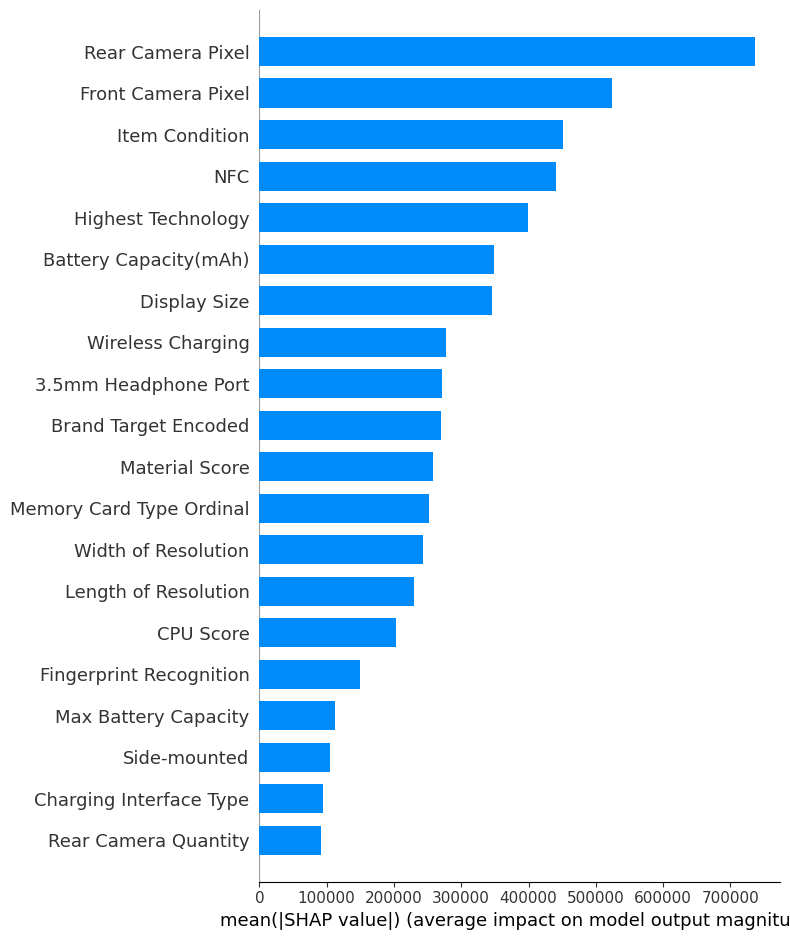

In [82]:
shap.summary_plot(shap_values, X_train, plot_type="bar", show=False)
plt.savefig('importance.png', bbox_inches='tight')
plt.show()
